In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [33]:
df =pd.read_csv("train.csv",delimiter=",")

In [34]:
df.head()

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [35]:
df.shape

(7176, 5)

In [36]:
y_train = df[' EP']

In [37]:
del df[' EP']

In [38]:
df.iloc[-1][2]

1010.69

In [39]:
df.tail(50).mean()

# T      19.9216
 V       56.0652
 AP    1013.1724
 RH      74.6096
dtype: float64

In [40]:
df.describe()

,# T,V,AP,RH
count,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818
std,7.475256,12.751468,5.964863,14.625093
min,1.810000,25.360000,992.890000,25.560000
25%,13.470000,41.740000,1009.010000,63.202500
50%,20.315000,52.050000,1012.910000,74.895000
75%,25.720000,66.540000,1017.302500,84.925000
max,35.770000,81.560000,1033.300000,100.160000


In [41]:
df.isnull().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

In [42]:
df.isna().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

# Exploratory Data analysis

In [43]:
ep_min =np.min(y_train)
ep_max=y_train.max()
ep_mean=np.mean(y_train)
ep_median = np.median(y_train)
ep_std =np.std(y_train)

first_quartile =np.percentile(y_train,25)
third_quartile =np.percentile(y_train,75)
inter_quartile = third_quartile -first_quartile


print("statistics for combined cycle power plant")
print("ep minimum:",ep_min)
print("ep maximum:",ep_max)
print("ep mean:",ep_mean)
print("ep median:",ep_median)
print("ep standard deviation:",ep_std)
print("First Quartile:",first_quartile)
print("InterQuartile :",inter_quartile)
print("Third Quartile:",third_quartile)

statistics for combined cycle power plant
ep minimum: 420.26
ep maximum: 495.76
ep mean: 454.43129319955347
ep median: 451.74
ep standard deviation: 17.13337725345268
First Quartile: 439.7375
InterQuartile : 28.930000000000007
Third Quartile: 468.6675


# plotting

C:\Users\Meow\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


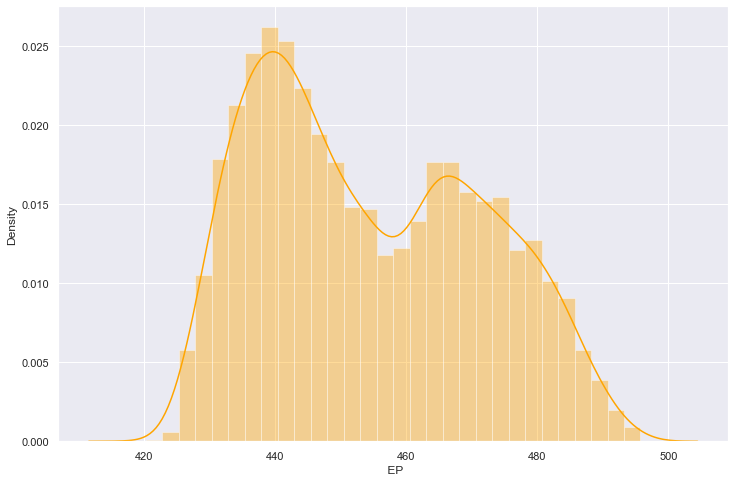

In [44]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(y_train,bins=30,color='orange')
plt.show()

# correlation 

In [45]:
corr_df = df.copy()
corr_df['EP'] =y_train
corr_df.head()

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


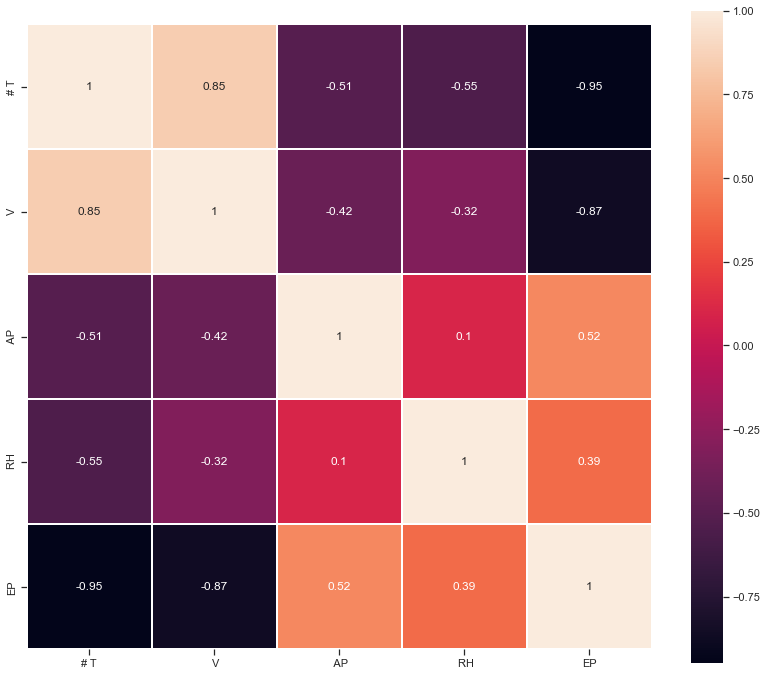

In [15]:
sns.set(style="ticks",color_codes=True)
plt.figure(figsize=(14,12))
sns.heatmap(corr_df.astype('float32').corr(),linewidth =0.1,annot=True,square =True)
plt.show()

# Feature plot

In [16]:
df.columns

Index(['# T', ' V', ' AP', ' RH'], dtype='object')

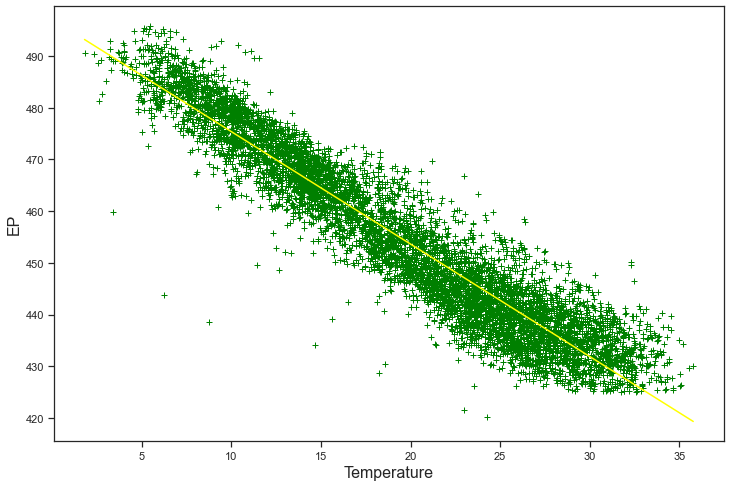

In [17]:
plt.plot(corr_df["# T"],corr_df["EP"], '+', color='green')
plt.plot(np.unique(corr_df['# T']), np.poly1d(np.polyfit(corr_df["# T"], corr_df['EP'], 1))
         (np.unique(corr_df['# T'])), color='yellow')
plt.xlabel("Temperature", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

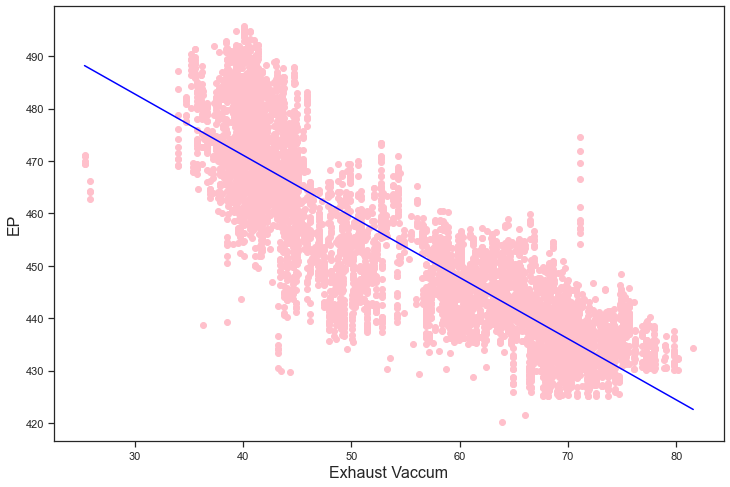

In [18]:
plt.plot(corr_df[" V"],corr_df["EP"], 'o', color='pink')
plt.plot(np.unique(corr_df[' V']), np.poly1d(np.polyfit(corr_df[" V"], corr_df['EP'], 1))
         (np.unique(corr_df[' V'])), color='blue')
plt.xlabel("Exhaust Vaccum", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

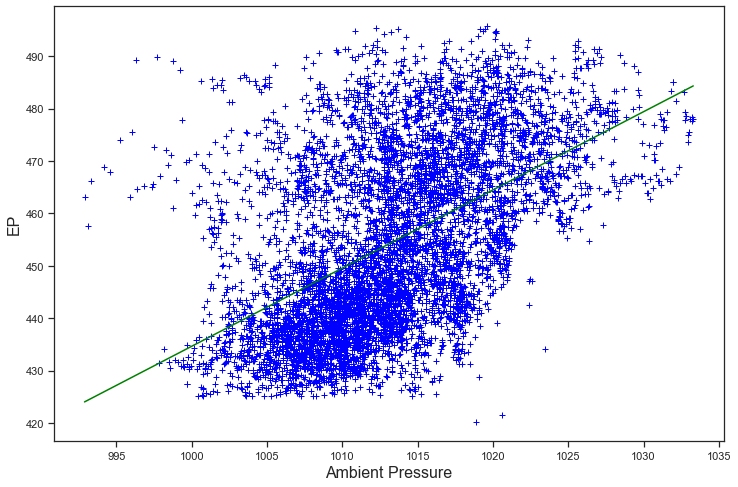

In [19]:
plt.plot(corr_df[" AP"],corr_df["EP"], '+', color='blue')
plt.plot(np.unique(corr_df[' AP']), np.poly1d(np.polyfit(corr_df[" AP"], corr_df['EP'], 1))
         (np.unique(corr_df[' AP'])), color='green')
plt.xlabel("Ambient Pressure", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

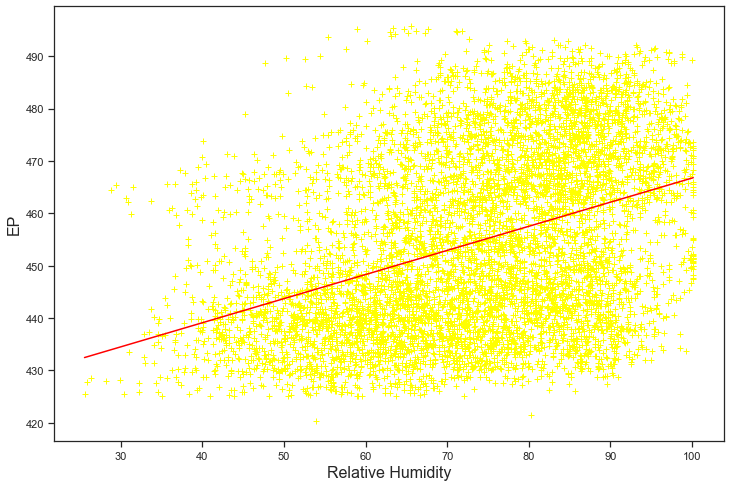

In [20]:
plt.plot(corr_df[" RH"],corr_df["EP"], '+', color='yellow')
plt.plot(np.unique(corr_df[' RH']), np.poly1d(np.polyfit(corr_df[" RH"], corr_df['EP'], 1))
         (np.unique(corr_df[' RH'])), color='red')
plt.xlabel("Relative Humidity", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

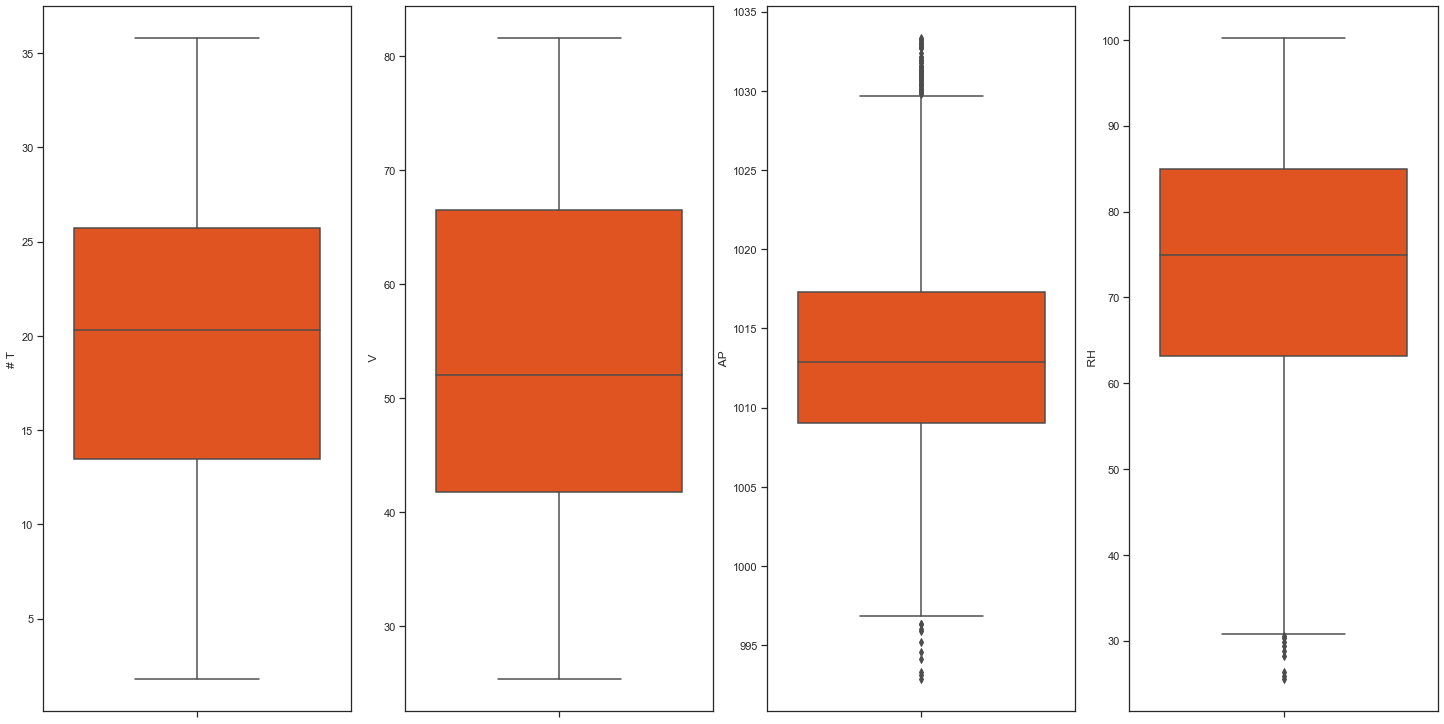

In [21]:
fig, axs =plt.subplots(ncols=4, nrows=1, figsize=(20,10))
index=0
axs = axs.flatten()
for i,v in df.items():
    sns.boxplot(y=i, data=df, ax=axs[index], color='orangered')
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

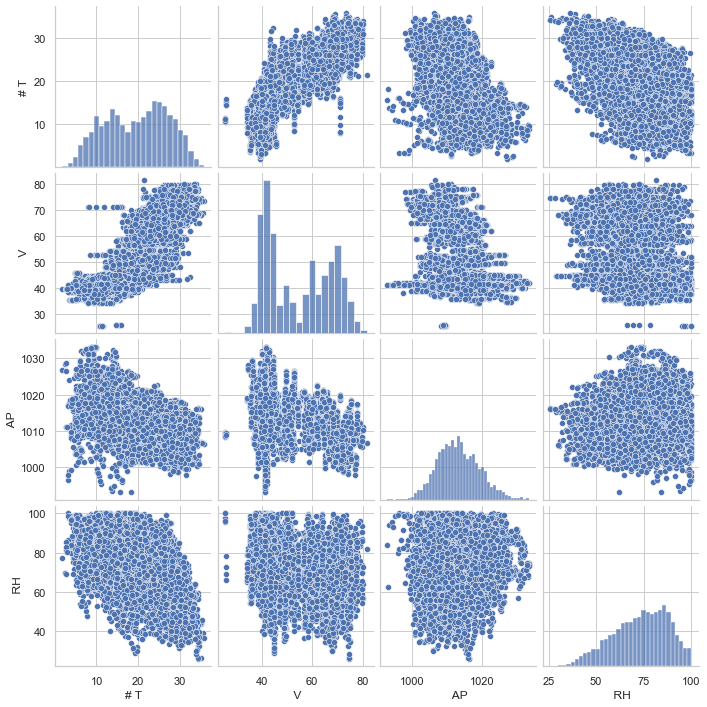

In [22]:
#pairplot
sns.set(style='whitegrid')
features_plot =df.columns

sns.pairplot(df[features_plot]);
plt.tight_layout
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00]])

In [24]:
x_train= df

In [25]:
# import the library for the ML part
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)
gbr

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)

In [26]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)

In [28]:
# Predict
x_test = np.genfromtxt('test.csv', delimiter=',')
y_train.ravel(order='A')

y_pred = gbr.predict(x_test)

In [29]:
y_pred

array([472.48543507, 461.71928633, 434.22314744, ..., 443.59570999,
       457.24078238, 443.65087566])

In [30]:
gbr.score(x_train, y_train)

0.9985409934078529

In [31]:
np.savetxt('Predict.csv', y_pred, fmt="%.5f")